In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np
import os
import re

output_folder = "C:/Users/Shuyu Li/Desktop/Data_Analysis/results"
os.makedirs(output_folder, exist_ok=True)

original_data = pd.read_excel("C:/Users/Shuyu Li/Desktop/raw_data.xlsx")
original_data.columns = ['Variant', 'max F/F0', 'Baseline']

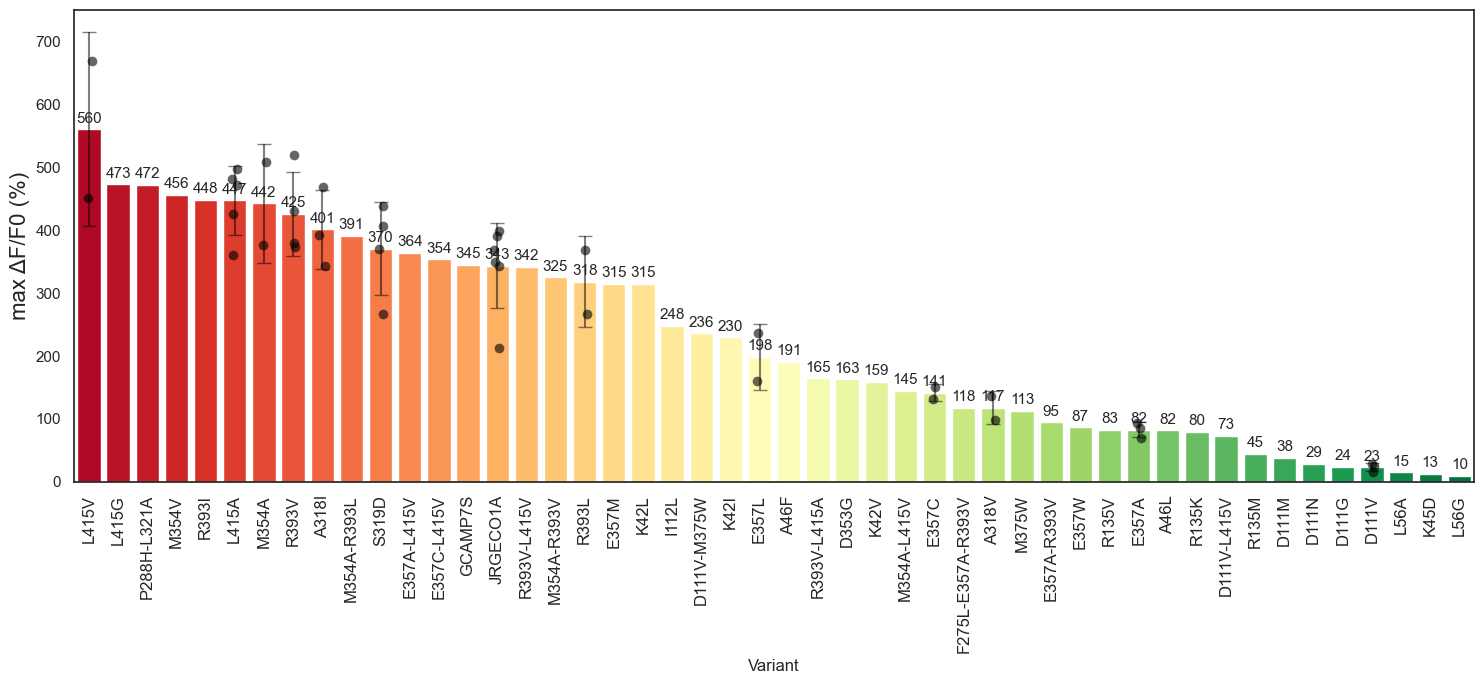

'C:/Users/Shuyu Li/Desktop/Data_Analysis\\all_variants_max_delta_F_F0.svg'

In [41]:
group_stats = original_data.groupby('Variant').agg(
    mean_value=('max F/F0', 'mean'),
    std_value=('max F/F0', 'std'),
    count=('max F/F0', 'count')
).reset_index()

group_stats = group_stats.sort_values(by='mean_value', ascending=False)
variant_order = group_stats['Variant'].tolist()

cmap = sns.color_palette("RdYlGn", len(group_stats))
group_stats['color'] = cmap

sns.set(style="white")
plt.figure(figsize=(15, 7))

for i, row in group_stats.iterrows():
    variant = row['Variant']
    mean_val = row['mean_value']
    std_val = row['std_value']
    count = row['count']
    color = row['color']

    plt.bar(variant, mean_val, color=color)

    if count > 1 and not np.isnan(std_val):
        plt.errorbar(x=variant, y=mean_val, yerr=std_val,
                     fmt='none', ecolor='black', elinewidth=1.5,
                     alpha=0.5, capsize=5)

    plt.text(x=variant, y=mean_val + 0.01 * group_stats['mean_value'].max(),
             s=f"{int(mean_val)}", ha='center', va='bottom', fontsize=11)

multi_measured = original_data.groupby('Variant').filter(lambda x: len(x) > 1)

sns.stripplot(data=multi_measured, x="Variant", y="max F/F0",
              color="black", alpha = 0.6, size=7, jitter=True, order=variant_order)

#plt.title("max ΔF/F0 per Variant in Different Batch Measurements", fontsize=18)
plt.ylabel("max ΔF/F0 (%)",fontsize=16)
plt.xticks(rotation=90, fontsize=12)

plt.tight_layout()
output_file = os.path.join(output_folder, "all_variants_max_delta_F_F0.svg")
plt.savefig(output_file, format='svg')
plt.show()
output_file

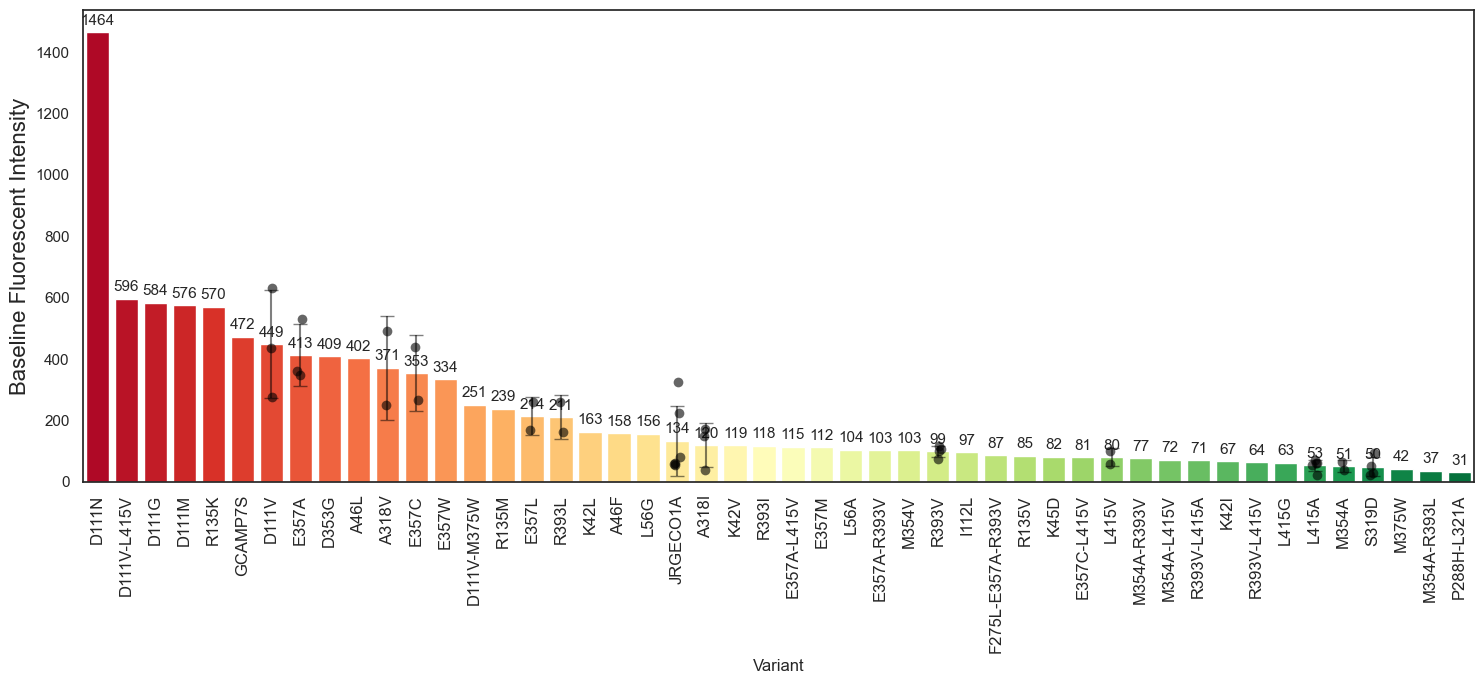

'C:/Users/Shuyu Li/Desktop/Data_Analysis\\all_variants_baseline_fluorescent_intensity.svg'

In [42]:
group_stats = original_data.groupby('Variant').agg(
    mean_value=('Baseline', 'mean'),
    std_value=('Baseline', 'std'),
    count=('Baseline', 'count')
).reset_index()

group_stats = group_stats.sort_values(by='mean_value', ascending=False)
variant_order = group_stats['Variant'].tolist()

cmap = sns.color_palette("RdYlGn", len(group_stats))
group_stats['color'] = cmap

sns.set(style="white")
plt.figure(figsize=(15, 7))

for i, row in group_stats.iterrows():
    variant = row['Variant']
    mean_val = row['mean_value']
    std_val = row['std_value']
    count = row['count']
    color = row['color']

    plt.bar(variant, mean_val, color=color)

    if count > 1 and not np.isnan(std_val):
        plt.errorbar(x=variant, y=mean_val, yerr=std_val,
                     fmt='none', ecolor='black', elinewidth=1.5,
                     alpha=0.5, capsize=5)

    plt.text(x=variant, y=mean_val + 0.01 * group_stats['mean_value'].max(),
             s=f"{int(mean_val)}", ha='center', va='bottom', fontsize=11)

multi_measured = original_data.groupby('Variant').filter(lambda x: len(x) > 1)

sns.stripplot(data=multi_measured, x="Variant", y="Baseline",
              color="black", alpha = 0.6, size=7, jitter=True, order=variant_order)

#plt.title("Baseline Fluorescent Intensity per Variant in Different Batch Measurements", fontsize=18)
plt.ylabel("Baseline Fluorescent Intensity",fontsize=16)
plt.xticks(rotation=90, fontsize=12)

plt.tight_layout()
output_file = os.path.join(output_folder, "all_variants_baseline_fluorescent_intensity.svg")
plt.savefig(output_file, format='svg')
plt.show()
output_file

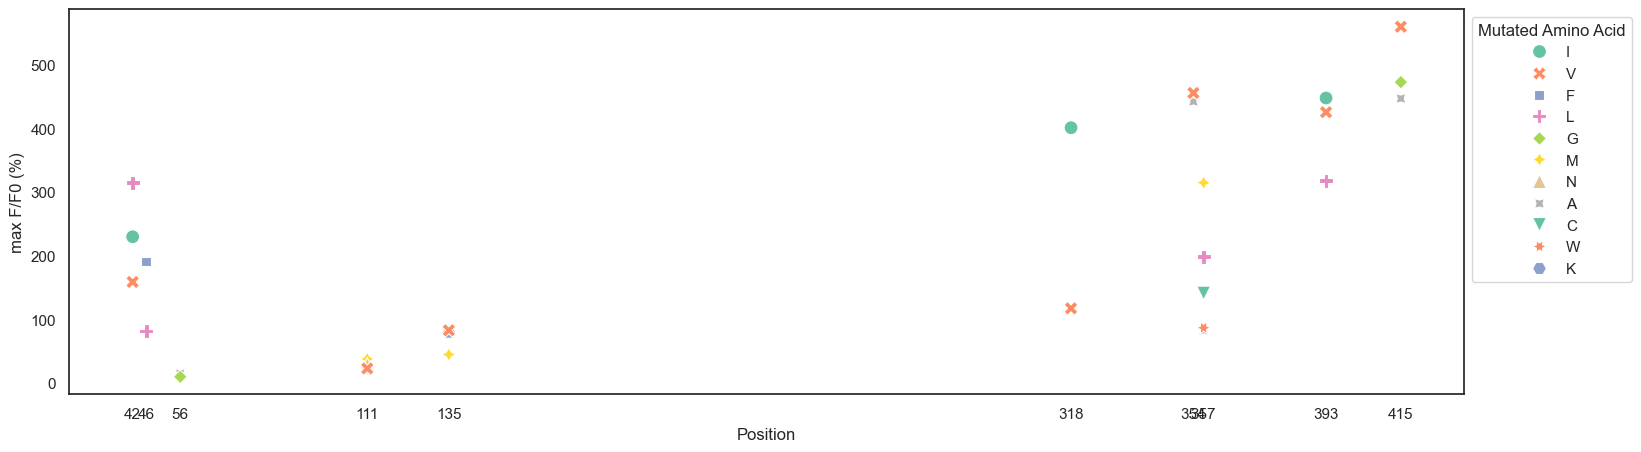

'C:/Users/Shuyu Li/Desktop/Data_Analysis/results\\all.svg'

In [ ]:
average_data = pd.read_excel("C:/Users/Shuyu Li/Desktop/Data_Analysis/average_metrics_by_variant.xlsx")

single_point_mutations = average_data[~average_data['Variant'].str.contains('-')]

def extract_position_info(variant_name):
    match = re.match(r"([A-Za-z]+)(\d+)([A-Za-z]+)", variant_name)
    if match:
        wild_type = match.group(1)
        position = int(match.group(2))
        mutated_aa = match.group(3)
        return wild_type, position, mutated_aa
    return None, None, None

single_point_mutations[['WildType', 'Position', 'MutatedAA']] = single_point_mutations['Variant'].apply(
    lambda x: pd.Series(extract_position_info(x))
)

position_grouped = single_point_mutations.groupby('Position').filter(
    lambda x: len(x['MutatedAA'].unique()) > 1
)

position_grouped = single_point_mutations.groupby('Position').filter(lambda x: len(x['MutatedAA'].unique()) > 1)
# 只保留 Position ≤ 135 的数据
#position_grouped = position_grouped[position_grouped['Position'] >= 300]
# 只保留位置在 100 到 150 之间的数据
#position_grouped = position_grouped[(position_grouped['Position'] >= 100) & (position_grouped['Position'] <= 150)]

sns.set(style="white")
plt.figure(figsize=(18, 5))

sns.scatterplot(
    data=position_grouped,
    x="Position",
    y="max F/F0",
    hue="MutatedAA",
    style="MutatedAA",
    palette="Set2",
    s=100,
    legend="full"
)

for position in position_grouped['Position'].unique():
    subset = position_grouped[position_grouped['Position'] == position]
    mean_values = subset.groupby('MutatedAA')['max F/F0'].mean()
    std_values = subset.groupby('MutatedAA')['max F/F0'].std()
    
    for mutated_aa in mean_values.index:
        plt.errorbar(
            position,
            mean_values[mutated_aa],
            yerr=std_values[mutated_aa],
            fmt='none',
            ecolor='black',
            capsize=5,
            alpha=0.5
        )

plt.xticks(sorted(position_grouped['Position'].unique()))

#plt.title("Mutation Tolerance")
plt.xlabel("Position")
plt.ylabel("max F/F0 (%)")
plt.legend(title="Mutated Amino Acid", bbox_to_anchor=(1, 1), loc='upper left')
output_file = os.path.join(output_folder, "all.svg")
plt.savefig(output_file, format='svg')
plt.show()
output_file


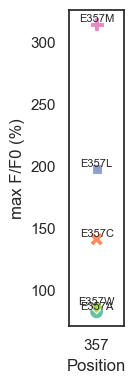

'C:/Users/Shuyu Li/Desktop/Data_Analysis/results\\357.svg'

In [ ]:
average_data = pd.read_excel("C:/Users/Shuyu Li/Desktop/Data_Analysis/357.xlsx")

single_point_mutations = average_data[~average_data['Variants'].str.contains('-')]

def extract_position_info(variant_name):
    match = re.match(r"([A-Za-z]+)(\d+)([A-Za-z]+)", variant_name)
    if match:
        wild_type = match.group(1)
        position = int(match.group(2))
        mutated_aa = match.group(3)
        return wild_type, position, mutated_aa
    return None, None, None

single_point_mutations[['WildType', 'Position', 'MutatedAA']] = single_point_mutations['Variants'].apply(
    lambda x: pd.Series(extract_position_info(x))
)

position_grouped = single_point_mutations.groupby('Position').filter(
    lambda x: len(x['MutatedAA'].unique()) > 1
)

sns.set(style="white")

plt.figure(figsize=(1.5, 4))

ax = sns.scatterplot(
    data=position_grouped,
    x="Position",
    y="max F/F0",
    hue="MutatedAA",
    style="MutatedAA",
    palette="Set2",
    s=100,
    legend=False
)

for position in position_grouped['Position'].unique():
    subset = position_grouped[position_grouped['Position'] == position]
    mean_values = subset.groupby('MutatedAA')['max F/F0'].mean()
    std_values = subset.groupby('MutatedAA')['max F/F0'].std()
    
    for mutated_aa in mean_values.index:
        plt.errorbar(
            position,
            mean_values[mutated_aa],
            yerr=std_values[mutated_aa],
            fmt='none',
            ecolor='black',
            capsize=5,
            alpha=0.5
        )

for _, row in position_grouped.iterrows():
    plt.text(
        row['Position'],
        row['max F/F0'],
        row['Variants'],
        fontsize=8,
        ha='center',
        va='bottom'
    )

plt.ylabel("max F/F0 (%)")
positions = sorted(position_grouped['Position'].unique())
plt.xticks(ticks=positions, labels=["357"] * len(positions))  

plt.tight_layout()
output_file = os.path.join(output_folder, "357.svg")
plt.savefig(output_file, format='svg')
plt.show()
output_file
